<a href="https://colab.research.google.com/github/ibsenvillarroel/titanic-linear-regression/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup and Imports / Configuracion e Imports 

In [ ]:
!pip install -q sklearn #doesn't come by defalut with colab / No viene por defecto en colab 

In [ ]:
%tensorflow_version 2.x 

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np #matrix operations / oparaciones con matrices 
import pandas as pd #data analytic tool / herramienta para el analisi de datos 
import matplotlib.pyplot as plt #visualization / visualizacion 
from IPython.display import clear_output #to clear the output / para limpiar el resultado  
from six.moves import urllib 

import tensorflow as tf #
from tensorflow import feature_column as fc #bridge between raw data and estimator or models / puente entre la data pura y el modelo a utilizar

#Data

The dataset we will be focusing on here is the titanic dataset, it has a lot information about each passanger on the ship. Our first step is to understand the data and explore it.

la data con la que trabajarremos sera la del titanic que contiene basrante informacion sobre los pasajeron en el barco. Nuestro primer paso sera entender y explorar la data 


In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data / data de entrenaiento
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data / data de prueba 
y_train = dftrain.pop('survived') #remove the column and storage in the variable / remueve la columna y la almacena en la variable 
y_eval = dfeval.pop('survived')

#print(dftrain.loc[0], y_train.loc[0]) #elijo una registro en especifico
print(dftrain['age']) #elijo una columna en especifico


0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


To look the data we'll use the `.head()` method from pandas, this will show us the first 5 elements in our dataframe.

Para observar la data con la que trabajaremos utilizaremos el metodo de pandas `.head()` nos retornara los primeros 5 elementos de nuestra datframe 

In [ ]:
#@title Texto de título predeterminado
dftrain.head() #imprime los primeros 5 valores del dataset 

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


If we want a more statistical anlysis of our data we can use the `.describe()` method.

Si queremos un analisi mas estadistico de nuestra data utilizemos el metodo `.describe()`

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


Si queremos observar como que froma tiene nuestra matriz, utilizaremos el metodo `.shape`

In [ ]:
dftrain.shape

(627, 9)

Let's generate some graphs of the data / Generemos algunos graficos de la data  

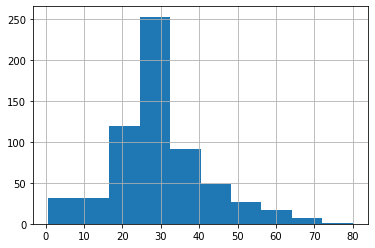

In [ ]:
dftrain.age.hist(bins=10)

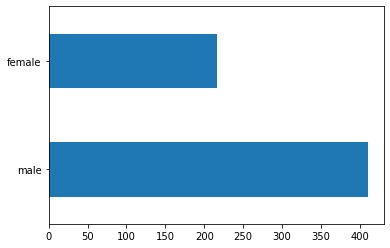

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

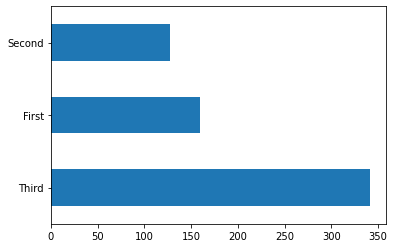

In [ ]:
dftrain['class'].value_counts().plot(kind='barh') #class esta resevada por eso la llamoasi entre corchetes

Text(0.5, 0, '% survived')

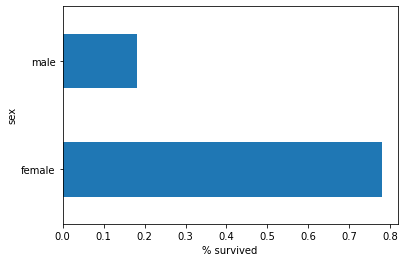

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

Utilizaremos feature column

In [ ]:
from tensorflow.python.feature_column import feature_column
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch','class','deck','embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary= dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Conceptos a estudiar, batch y epochs
batch cuando trabajamos con larges data sets lo necesitmos para reducir el tiempo en el q corre el modelo

los epochs son las veces q le vamos a mostrar la data al modelo, una vez puede ser insufucuente pero muchas veces el modelo podria aprender nuestra data y cuando llegue data nueva hacerl mal

Input function, este codigo nos servira para convertir nuestra dataset en tf.data.Dataset y nos indicara el batch y los epochs necesarios 

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): #inner function, this will be returned 
    ds= tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) #create tf.data.Dataset object with data and its label
    if shuffle:
      ds= ds.shuffle(1000)  #ramdomize order of the data
    ds= ds.batch(batch_size).repeat(num_epochs)  #splita dataset into batches of 32 and repeat process for number of epochs
    return ds  #return a batch of the dataset
  return input_function #return a function object for use 

train_input_fn = make_input_fn(dftrain, y_train)  #here we call input_function that was returned to us to get a dataset object we can feed to the model 
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)




Creating the model 

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpb2j9_erh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Trainig the model 

In [ ]:
linear_est.train(train_input_fn)  #train
result = linear_est.evaluate(eval_input_fn)  #get model metrics/stats by testing on testing data 

clear_output()  #clear console output 
print(result['accuracy']) #the result variable is simply a dict of stats about our model / si solo imprimimos resultado nos traera todos las columnas con los resultados 

0.75757575


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[0])
print(y_eval.loc[0])
print(result[0]['probabilities'][1]) #podemos evaluar nuestro modelo, revisando la data de un pasajero en especifico y su prediccion

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb2j9_erh/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
0.049180165
